In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from dython.nominal import associations
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv('./MBA.csv')
df['race'] = df['race'].replace({'Other': 'international student', np.nan: 'international student'})
df['admission'] = df['admission'].replace({np.nan: 'Deny'})
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,international student,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


## 1. Data Summary

In [ ]:
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
None


In [ ]:
print(df.describe())  # Summary statistics of numerical features

       application_id          gpa         gmat     work_exp
count     6194.000000  6194.000000  6194.000000  6194.000000
mean      3097.500000     3.250714   651.092993     5.016952
std       1788.198115     0.151541    49.294883     1.032432
min          1.000000     2.650000   570.000000     1.000000
25%       1549.250000     3.150000   610.000000     4.000000
50%       3097.500000     3.250000   650.000000     5.000000
75%       4645.750000     3.350000   680.000000     6.000000
max       6194.000000     3.770000   780.000000     9.000000


## 2. Univariate Analysis

### a. Numerical Variables

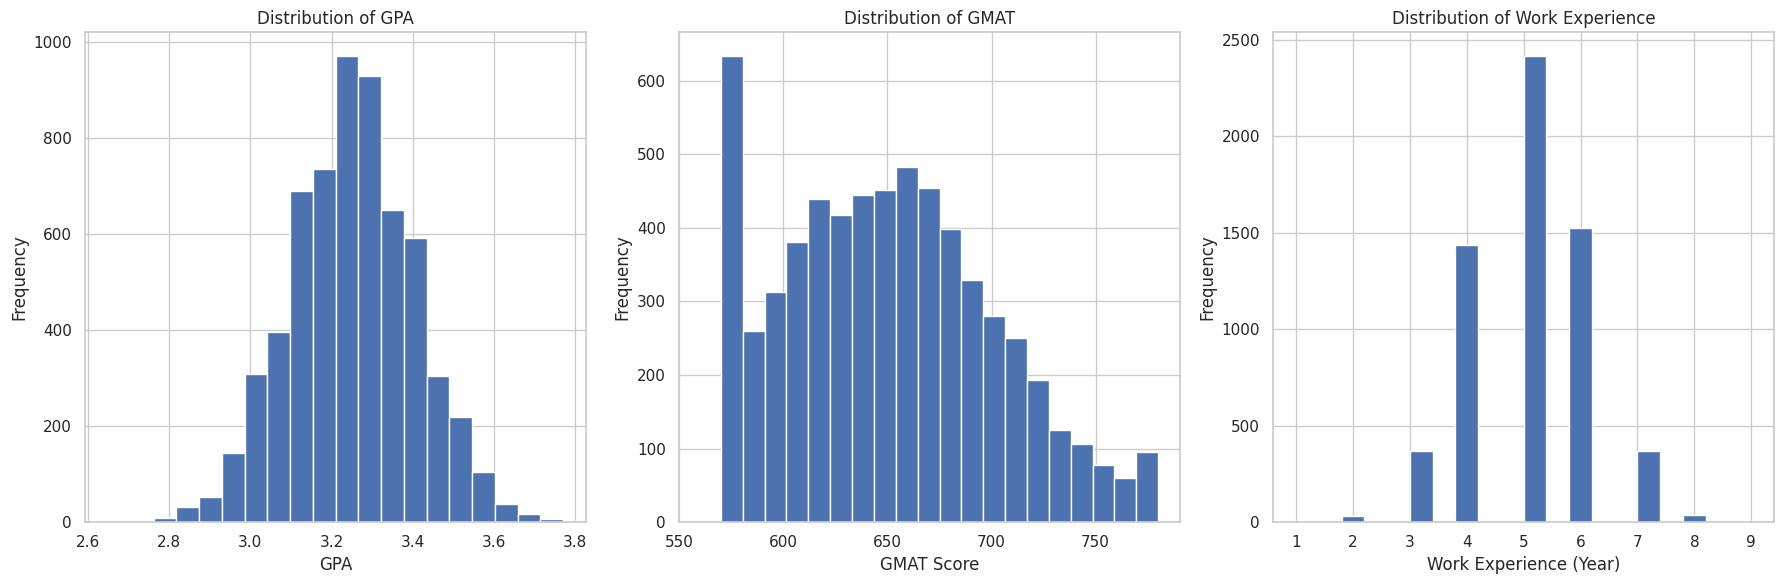

In [ ]:
# Distribution of GPA, GMAT, and work experience
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# GPA
axs[0].hist(df['gpa'], bins=20)
axs[0].set_title('Distribution of GPA')
axs[0].set_xlabel('GPA')
axs[0].set_ylabel('Frequency')
#axs[0].set_xticks(np.arange(2.6, 3.9, 0.2))

# GMAT
axs[1].hist(df['gmat'], bins=20)
axs[1].set_title('Distribution of GMAT')
axs[1].set_xlabel('GMAT Score')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks(np.arange(550, 800, 50))

# work experience
axs[2].hist(df['work_exp'], bins=20)
axs[2].set_title('Distribution of Work Experience')
axs[2].set_xlabel('Work Experience (Year)')
axs[2].set_ylabel('Frequency')
axs[2].set_xticks(np.arange(1, 10, 1))

plt.tight_layout()
plt.show()

The Wharton MBA Class of 2025 applicant data reveals compelling patterns across three critical metrics: academic performance, standardized testing, and professional experience.

+ The GPA distribution shows a concentrated **range between 3.2 and 3.6**, with a **peak around 3.3-3.4**, indicating that most applicants maintain strong but not necessarily perfect academic records. The GMAT scores present an interesting bimodal distribution, with **peaks around 580-600 and 650-700**, suggesting distinct applicant pools or varying preparation levels among candidates.

+ Work experience emerges as a defining characteristic, with a clear preference for candidates having approximately 5 years of professional experience. The symmetric **distribution between 4-7 years** demonstrates Wharton's focus on mid-career professionals who have gained sufficient experience to contribute meaningfully to the program.

Together, these distributions paint a picture of the typical Wharton applicant: someone with a solid academic foundation (GPA around 3.3-3.5), competitive test scores (GMAT above 650), and meaningful professional experience (4-6 years). However, the bimodal GMAT distribution hints at the complexity of the admissions process and suggests that different combinations of these metrics might be valued differently for various applicant groups, warranting further investigation into other factors like industry background and demographic characteristics.

#### outliers

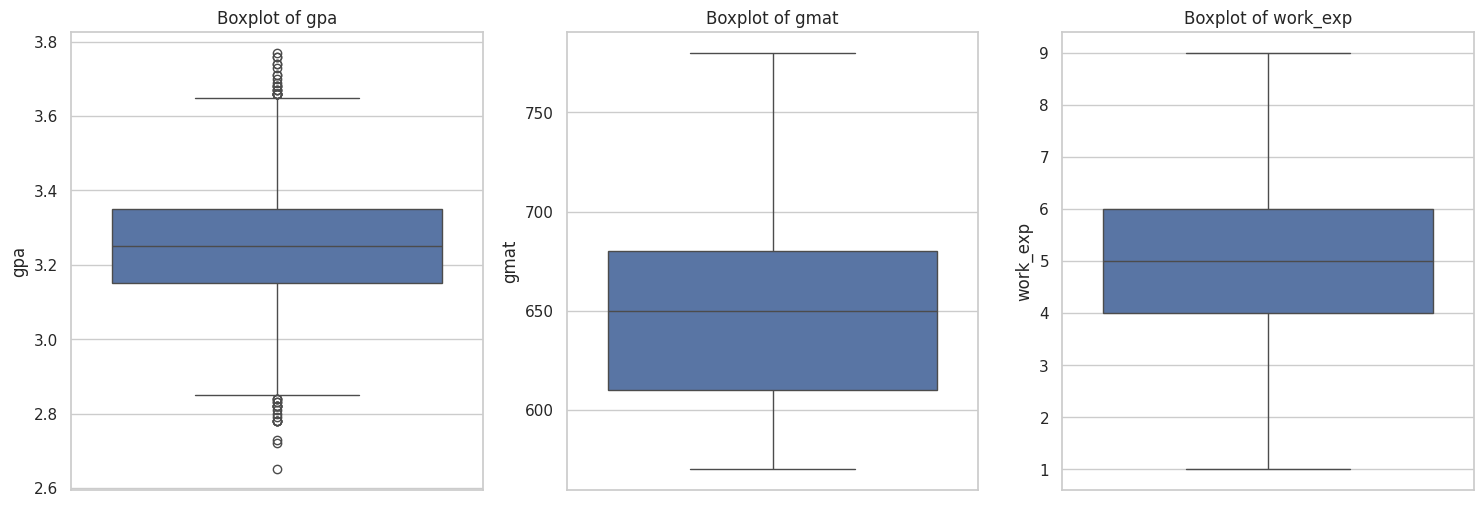

In [ ]:
numerical_cols = ['gpa', 'gmat', 'work_exp']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

GMAT scores present a more varied picture, with a median around 650 and a notably wider interquartile range spanning from approximately 610 to 680. The broader spread of scores, coupled with extended whiskers reaching from 570 to 780, suggests greater flexibility in standardized test requirements. This wider distribution might reflect Wharton's recognition of test-taking variability across different applicant backgrounds, or perhaps a more holistic approach to evaluating quantitative and verbal aptitude.  

The work experience boxplot tells perhaps the most straightforward story, with a clear concentration around 5 years and a symmetrical distribution ranging from 4 to 6 years in the interquartile range. The full span from 1 to 9 years, with relatively few outliers, indicates that while Wharton has a strong preference for mid-career professionals, they maintain openness to candidates at different career stages who can demonstrate exceptional potential or accomplishments.

This multi-faceted analysis suggests that Wharton's admissions process balances strict academic standards with flexibility in other areas. **The tight GPA range implies a baseline academic threshold, while the wider GMAT distribution and varied work experience ranges suggest opportunities for candidates to distinguish themselves through different combinations of strengths.** This approach appears designed to build a class that maintains high academic standards while accommodating diverse professional backgrounds and experiences.

### b. Category Variable

<ipython-input-17-1535361e1bc3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='admission', ax=axs[1], palette=colors)


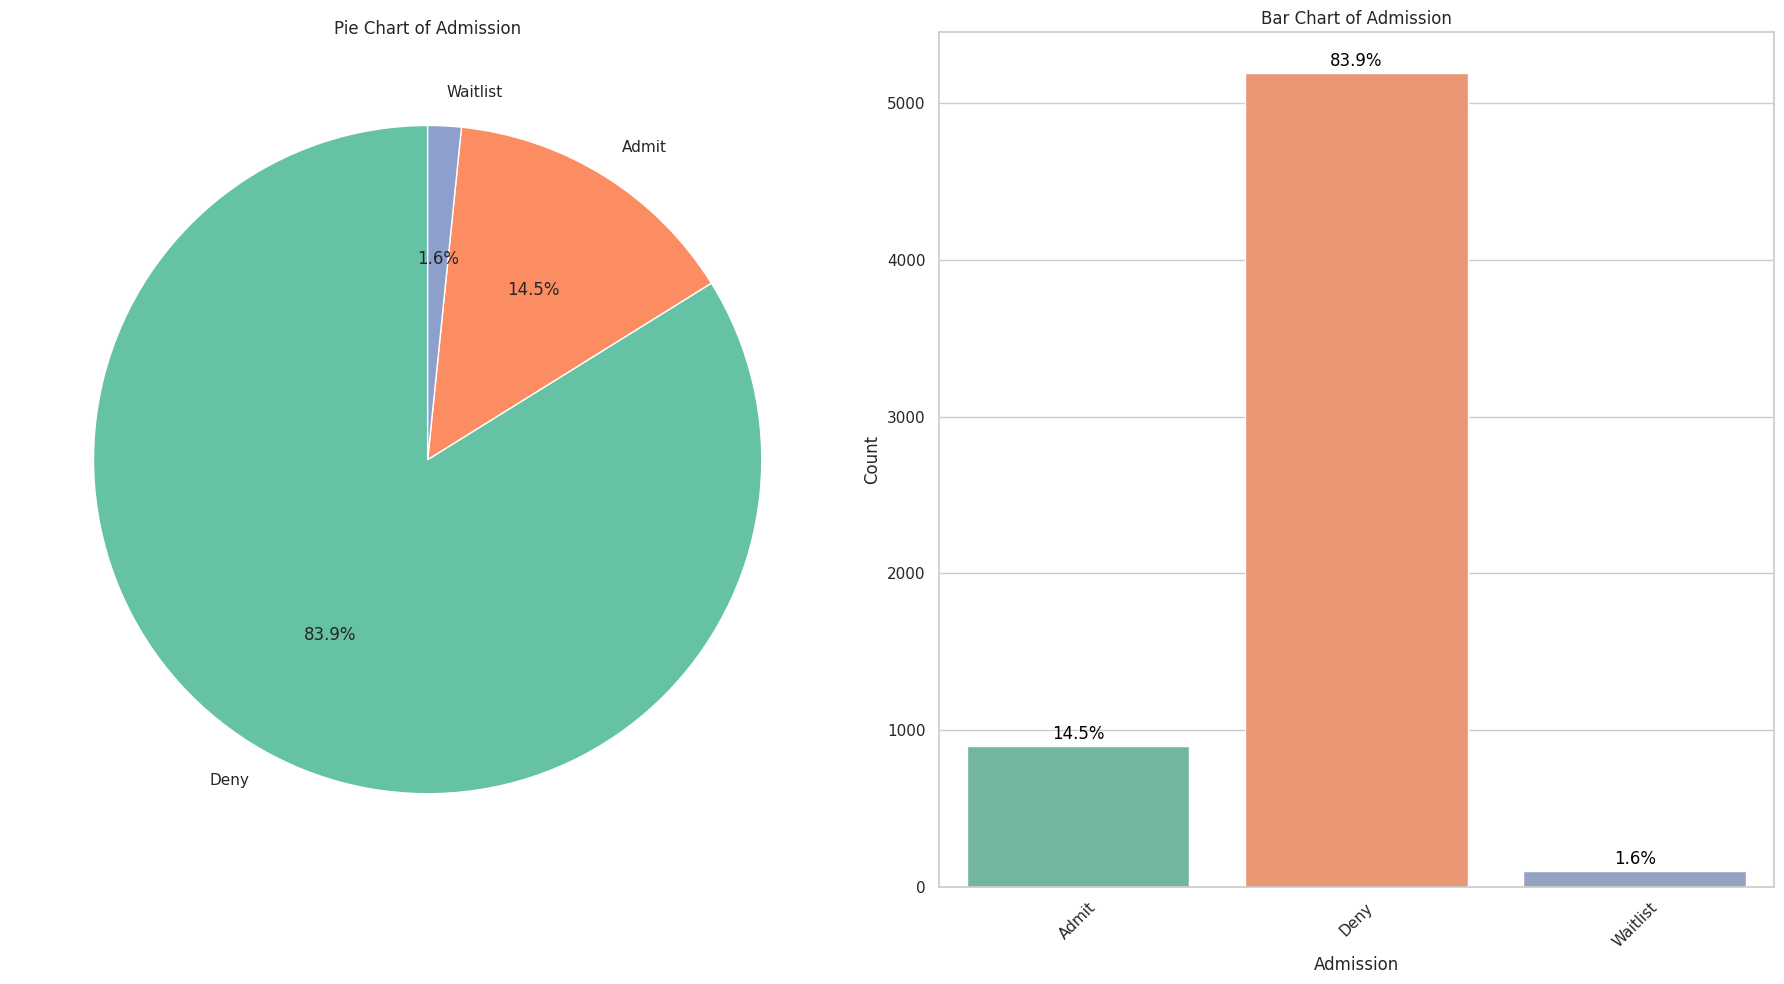

In [ ]:

colors = sns.color_palette('Set2', len(df['admission'].unique()))

# Admission
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

df['admission'].value_counts().plot.pie(ax=axs[0], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('Pie Chart of Admission')
axs[0].set_ylabel('')

sns.countplot(data=df, x='admission', ax=axs[1], palette=colors)
axs[1].set_title('Bar Chart of Admission')
axs[1].set_xlabel('Admission')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

total = len(df['admission'])
for p in axs[1].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axs[1].annotate(percentage,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


Admission Outcomes:

+ The vast majority (83.9%) of applicants were denied admission
+ Only 14.5% of applicants were admitted
+ A small fraction (1.6%) were placed on the waitlist
+ This translates to roughly a 1 in 7 acceptance rate

Selectivity and Competition:  
+ The **14.5% acceptance rate** demonstrates Wharton's position as one of the most selective MBA programs globally. The high denial rate (83.9%) underscores the intense competition for spots in the program, suggesting that even well-qualified candidates may face significant challenges in gaining admission.

Strategic Use of Waitlist:  
+ The notably **small waitlist percentage (1.6%)** indicates that Wharton employs a highly targeted approach to admissions. Rather than maintaining a large waitlist, they appear to make decisive decisions about most candidates. This suggests they have a clear vision of their desired class composition and are confident in their initial selection process.

<ipython-input-18-b6d036d57c1d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', ax=axs[1, 0], palette=colors_gender)
<ipython-input-18-b6d036d57c1d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='international', ax=axs[1, 1], palette=colors_international)
<ipython-input-18-b6d036d57c1d>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='major', ax=axs[1, 2], palette=colors_major)
<ipython-input-18-b6d036d57c1d>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

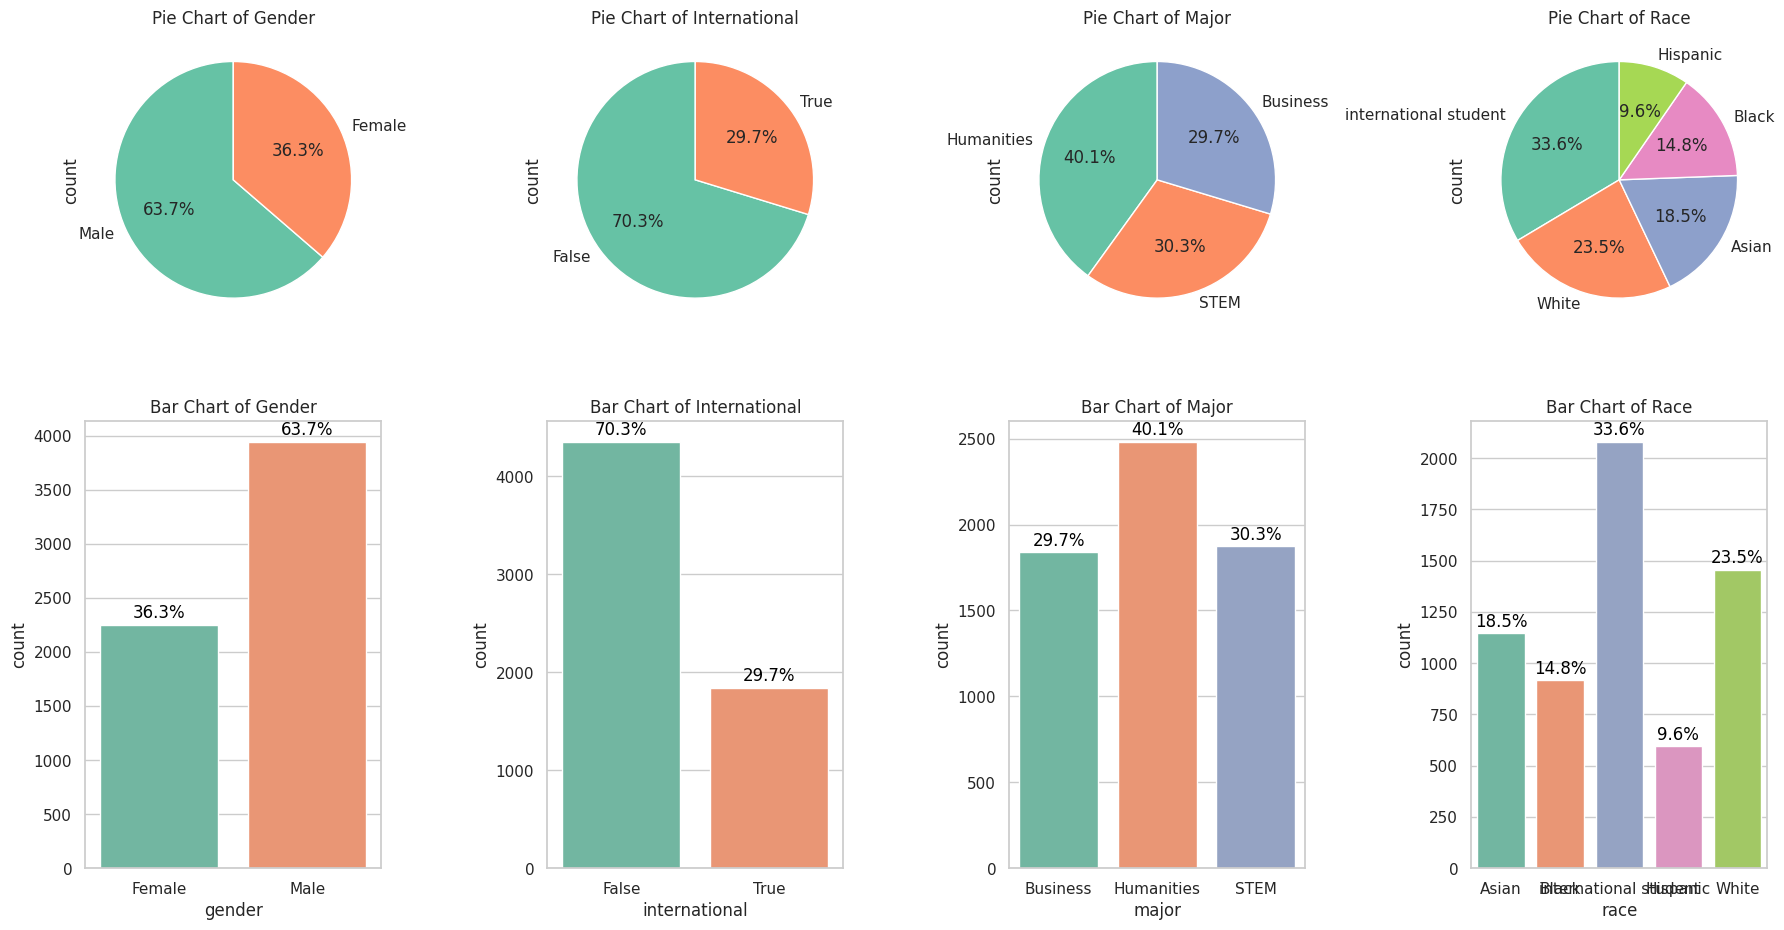

In [ ]:
colors_gender = sns.color_palette('Set2', len(df['gender'].unique()))
colors_international = sns.color_palette('Set2', len(df['international'].unique()))
colors_major = sns.color_palette('Set2', len(df['major'].unique()))
colors_race = sns.color_palette('Set2', len(df['race'].unique()))

fig, axs = plt.subplots(2, 4, figsize=(18, 10))

# Gender
df['gender'].value_counts().plot.pie(ax=axs[0, 0], autopct='%1.1f%%', startangle=90, colors=colors_gender)
axs[0, 0].set_title('Pie Chart of Gender')
sns.countplot(data=df, x='gender', ax=axs[1, 0], palette=colors_gender)
axs[1, 0].set_title('Bar Chart of Gender')

total_gender = len(df['gender'])
for p in axs[1, 0].patches:
    percentage = f'{100 * p.get_height() / total_gender:.1f}%'
    axs[1, 0].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# International
df['international'].value_counts().plot.pie(ax=axs[0, 1], autopct='%1.1f%%', startangle=90, colors=colors_international)
axs[0, 1].set_title('Pie Chart of International')
sns.countplot(data=df, x='international', ax=axs[1, 1], palette=colors_international)
axs[1, 1].set_title('Bar Chart of International')

total_international = len(df['international'])
for p in axs[1, 1].patches:
    percentage = f'{100 * p.get_height() / total_international:.1f}%'
    axs[1, 1].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Major
df['major'].value_counts().plot.pie(ax=axs[0, 2], autopct='%1.1f%%', startangle=90, colors=colors_major)
axs[0, 2].set_title('Pie Chart of Major')
sns.countplot(data=df, x='major', ax=axs[1, 2], palette=colors_major)
axs[1, 2].set_title('Bar Chart of Major')

total_major = len(df['major'])
for p in axs[1, 2].patches:
    percentage = f'{100 * p.get_height() / total_major:.1f}%'
    axs[1, 2].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Race
df['race'].value_counts().plot.pie(ax=axs[0, 3], autopct='%1.1f%%', startangle=90, colors=colors_race)
axs[0, 3].set_title('Pie Chart of Race')
sns.countplot(data=df, x='race', ax=axs[1, 3], palette=colors_race)
axs[1, 3].set_title('Bar Chart of Race')

total_race = len(df['race'])
for p in axs[1, 3].patches:
    percentage = f'{100 * p.get_height() / total_race:.1f}%'
    axs[1, 3].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


The demographic data for Wharton's MBA applicant pool reveals several interesting patterns across gender, international status, academic background, and racial composition. Here's a comprehensive analysis:

Gender Distribution:
- Male applicants dominate at 63.7% of the pool
- Female applicants comprise 36.3%
- This roughly 2:1 male-to-female ratio reflects continuing gender disparities in MBA applications, though it's improving from historical ratios

International vs. Domestic:
- Domestic applicants make up 70.3% of the pool
- International applicants represent 29.7%
- This suggests strong domestic interest while maintaining significant international diversity
- The ratio might be influenced by visa considerations and international recruitment strategies

Academic Background (Major):
- Humanities leads at 40.1%
- STEM follows at 30.3%
- Business backgrounds represent 29.7%
- The relatively even distribution suggests Wharton values diverse academic backgrounds
- Notable that non-business majors (combined 70.4%) outnumber business majors

Racial Demographics:
- International students comprise 33.6%
- White applicants make up 23.5%
- Asian applicants represent 18.5%
- Black applicants account for 14.8%
- Hispanic applicants comprise 9.6%

Key Insights:
1. Diversity Efforts:
- The substantial representation of women (36.3%) suggests active recruitment efforts but room for improvement
- Strong racial diversity indicates successful outreach to underrepresented groups
- The mix of international and domestic students shows global appeal while maintaining strong U.S. presence

2. Academic Diversity:
- The balanced distribution across major backgrounds indicates Wharton values diverse perspectives
- Strong showing of non-business majors suggests the program welcomes career switchers

3. Opportunities for Growth:
- Gender balance could be improved to reach closer to 50:50
- Hispanic representation might be an area for increased outreach
- International percentage might be affected by external factors (visa policies, global events)

This demographic profile suggests Wharton is making progress on diversity while maintaining its appeal to traditional applicant groups, though there's still room for increased representation in certain categories.

<ipython-input-19-51fa389a8f9c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='work_industry', ax=axs[1], palette=colors)


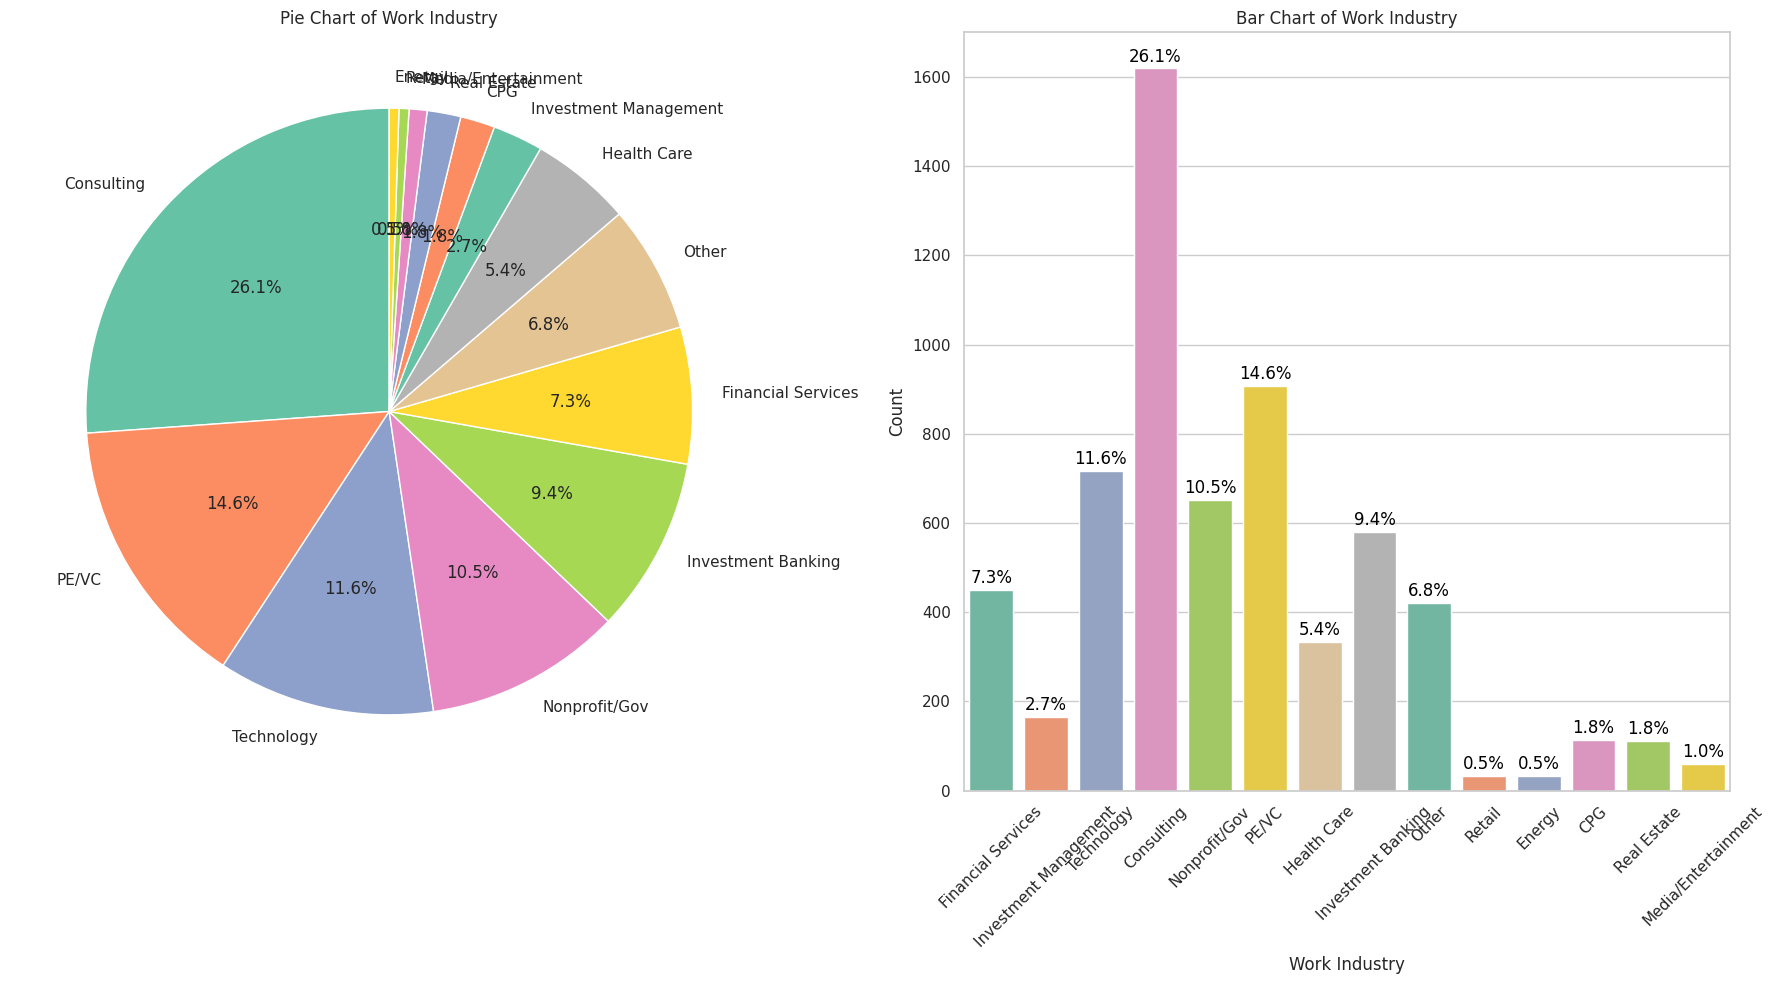

In [ ]:
colors = sns.color_palette('Set2', len(df['work_industry'].unique()))

# Work Industry
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

df['work_industry'].value_counts().plot.pie(ax=axs[0], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('Pie Chart of Work Industry')
axs[0].set_ylabel('')

sns.countplot(data=df, x='work_industry', ax=axs[1], palette=colors)
axs[1].set_title('Bar Chart of Work Industry')
axs[1].set_xlabel('Work Industry')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

total = len(df['work_industry'])
for p in axs[1].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axs[1].annotate(percentage,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


The professional backgrounds of Wharton's MBA Class of 2025 applicants paint a fascinating picture of both traditional pathways and evolving trends in business education. The distribution across industries reveals not only where these candidates are coming from, but also offers insights into potential career trajectories and Wharton's position in the business education landscape.

Consulting emerges as the dominant industry, representing **26.1%** of applicants. This substantial representation isn't surprising, as consulting has long been a traditional feeder for top MBA programs. Consultants often seek MBA degrees to deepen their business expertise, transition to industry roles, or return to consulting at higher levels. The large consulting contingent also suggests that these professionals value Wharton's analytical rigor and strategic focus.

The financial sector shows strong representation when combining **Private Equity/Venture Capital (14.6%)**, **Investment Banking (9.4%)**, and **Financial Services (7.3%)**, totaling approximately 31% of applicants. This significant presence reinforces Wharton's historical strength in finance education and its continued appeal to finance professionals. The particularly strong showing from PE/VC professionals might indicate the growing importance of advanced business education in the investment world.

**Technology** sector professionals comprise **11.6%** of applicants, reflecting the industry's growing influence in business education. This substantial representation suggests that even as tech companies sometimes question the value of traditional business credentials, many tech professionals still see significant value in Wharton's MBA program. The technology contingent likely brings different perspectives and expectations to the program compared to traditional finance and consulting applicants.

The presence of **nonprofit and government professionals c(10.5%)** is particularly interesting, as it indicates Wharton's appeal beyond traditional business sectors. These candidates often seek to combine their public service experience with business acumen, potentially aiming to create greater social impact or transition to the private sector. Their significant representation suggests Wharton's success in attracting diverse professional backgrounds.

The smaller but notable presence of industries like **Healthcare (5.4%)**, **Retail (0.5%)**, and **Energy (0.5%)** demonstrates Wharton's broad appeal across sectors. These niche representations are crucial for creating diverse classroom discussions and networking opportunities. They also suggest that professionals from these industries see value in gaining broader business expertise through an MBA program.

This industrial diversity has important implications for the MBA experience itself. The mix of backgrounds enriches classroom discussions, group projects, and networking opportunities. It also suggests that Wharton maintains its traditional strengths while successfully adapting to changes in the business landscape. The school appears to be effectively balancing its historical excellence in finance with the need to prepare leaders for emerging industries and challenges.

The data also hints at future trends in business education. While traditional industries like consulting and finance remain strong, the significant technology presence and diverse industry representation suggest an evolving landscape. This might indicate Wharton's successful adaptation to changing business needs while maintaining its core appeal to traditional MBA candidates.

## 3. Bivariate Analysis


### a. Heat map of the correlation between variables

In [ ]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,international student,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


The absolute value of the correlation between the numerical variables is not very large and the possibility of multicollinearity is low.

<Figure size 1200x1000 with 0 Axes>

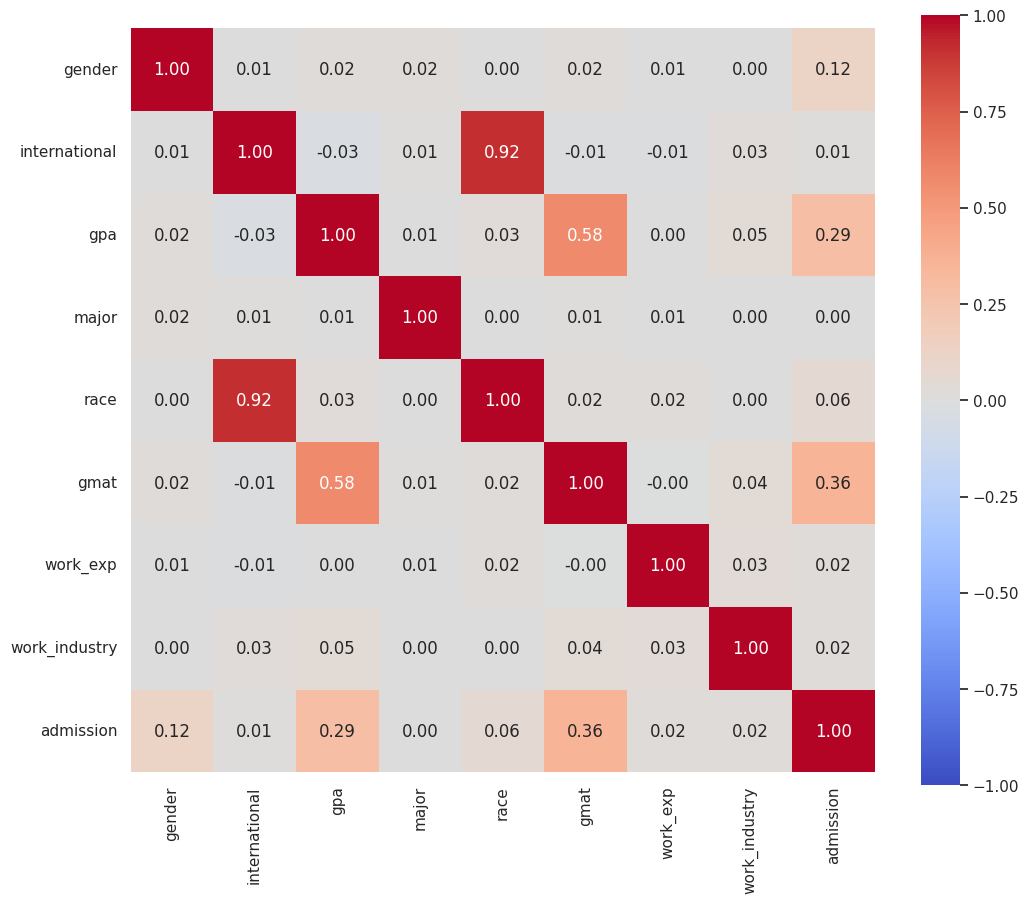

In [ ]:
plt.figure(figsize=(12, 10))
df_filtered = df.drop(columns=['application_id'])
associations(df_filtered, nominal_columns='auto', figsize=(12, 10), cmap='coolwarm')
plt.show()

Strong Correlations:
1. International Status and Race (0.92):
- Very strong positive correlation
- This makes sense as international students are typically coded in the race category
- Suggests these variables are effectively measuring similar demographic information

2. GPA and GMAT (0.58):
- Moderate positive correlation
- Indicates academic performance tends to be consistent across measures
- Students who perform well in undergraduate studies often do well on GMAT
- Shows these are complementary measures of academic ability

Admission-Related Correlations:
1. GMAT and Admission (0.36):
- Moderate positive correlation
- Suggests GMAT scores have meaningful impact on admission decisions
- But not deterministic, indicating holistic evaluation

2. GPA and Admission (0.29):
- Modest positive correlation
- Less influential than GMAT scores
- Still plays a role in admission decisions

3. Gender and Admission (0.12):
- Weak positive correlation
- Suggests slight relationship but minimal direct impact
- May indicate some success in diversity initiatives

Weak or No Correlations:
1. Work Experience/Industry:
- Very weak correlations with admission (0.02)
- Suggests these factors play minimal direct role
- Quality of experience might matter more than quantity

2. Major and Admission (0.00):
- No correlation
- Indicates Wharton is truly major-agnostic
- Supports their claim of valuing diverse academic backgrounds

Key Insights:
1. Academic Metrics Matter:
- Combined impact of GPA and GMAT is substantial
- But moderate correlations suggest they're not the only factors

2. Holistic Evaluation:
- No single factor shows very strong correlation with admission
- Supports Wharton's claim of comprehensive review process

3. Diversity Considerations:
- Weak correlations with demographic factors
- Suggests efforts to maintain balanced class composition
- Indicates successful implementation of diversity initiatives

This analysis suggests Wharton uses a balanced approach to admissions, considering multiple factors without over-relying on any single metric.


### b. VIF

In [ ]:
# Encode the variables
categorical_cols = df_filtered.select_dtypes(include=['object', 'bool']).columns
numerical_cols = df_filtered.select_dtypes(include=['int64', 'float64']).columns

# Category variables are uniquely thermally encoded using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical_data = encoder.fit_transform(df[categorical_cols])

# Combine encoded data with numeric variables
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))
numerical_df = df_filtered[numerical_cols].reset_index(drop=True)
df_encoded = pd.concat([numerical_df, encoded_categorical_df], axis=1)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = df_encoded.columns
vif_data['VIF'] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]

print(vif_data)


                                Feature         VIF
0                                   gpa  347.388432
1                                  gmat  276.417112
2                              work_exp   23.758790
3                           gender_Male    2.819549
4                    international_True    8.800006
5                      major_Humanities    2.347585
6                            major_STEM    2.021905
7                            race_Black    1.809340
8                         race_Hispanic    1.524657
9                            race_White    2.261542
10           race_international student   10.598122
11             work_industry_Consulting   14.049647
12                 work_industry_Energy    1.265218
13     work_industry_Financial Services    4.628314
14            work_industry_Health Care    3.717443
15     work_industry_Investment Banking    5.678102
16  work_industry_Investment Management    2.332968
17    work_industry_Media/Entertainment    1.481428
18          

- gpa and gmat have extremely high VIFs (347.39 and 276.42), suggesting that these two features are highly collinear with other features or each other.

- work_exp also has a VIF of 23.76, which is quite high, indicating potential multicollinearity with other features.

- Some categorical features, like international_True (VIF = 8.80) and work_industry_Consulting (VIF = 14.05), also exhibit relatively high VIFs. This suggests that these features might also be involved in multicollinearity.



The Variance Inflation Factor (VIF) analysis provides important insights into multicollinearity among variables in the Wharton MBA admissions data. Here's a detailed analysis:

High VIF Values (>10):
1. GPA (347.39) and GMAT (276.42):
- Extremely high VIF values indicate severe multicollinearity
- Suggests these academic metrics are strongly interrelated
- May need to consider using only one of these metrics in predictive models
- This aligns with earlier correlation analysis showing their strong relationship

Moderate VIF Values (5-10):
1. Work Experience (23.76)
2. Race_international student (10.60)
3. Work_industry_PE/VC (8.34)
4. International_True (8.50)
- These variables show moderate multicollinearity
- International status and race show expected overlap
- PE/VC industry may correlate with other financial sectors

Low to Moderate VIF Values (2-5):
1. Industry-specific VIFs:
- Consulting (14.05)
- Technology (6.74)
- Nonprofit/Gov (6.22)
- Financial Services (4.63)
- Shows some interdependence among industry categories
- Expected due to career path similarities

Low VIF Values (<2):
1. Demographic factors:
- Gender_Male (2.62)
- race_Black (1.81)
- race_Hispanic (1.52)
- Shows these demographic variables are relatively independent

Key Insights:
1. Model Considerations:
- May need to address high multicollinearity in academic metrics
- Consider creating composite scores or selecting one primary academic indicator

2. Industry Groupings:
- Consider consolidating similar industries
- Financial sector shows internal correlations
- Tech and consulting relatively independent

3. Demographic Independence:
- Gender and race variables show low multicollinearity
- Supports their use as independent factors in analysis

4. Admission Decisions:
- Admission_Deny (6.96) and Admission_Waitlist (1.11) show different patterns
- Suggests distinct decision-making processes for different outcomes


## 4. Relationship with Admission Decision

In [ ]:
df_filtered.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,Female,True,3.30,Business,international student,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


### a. Categorical Features

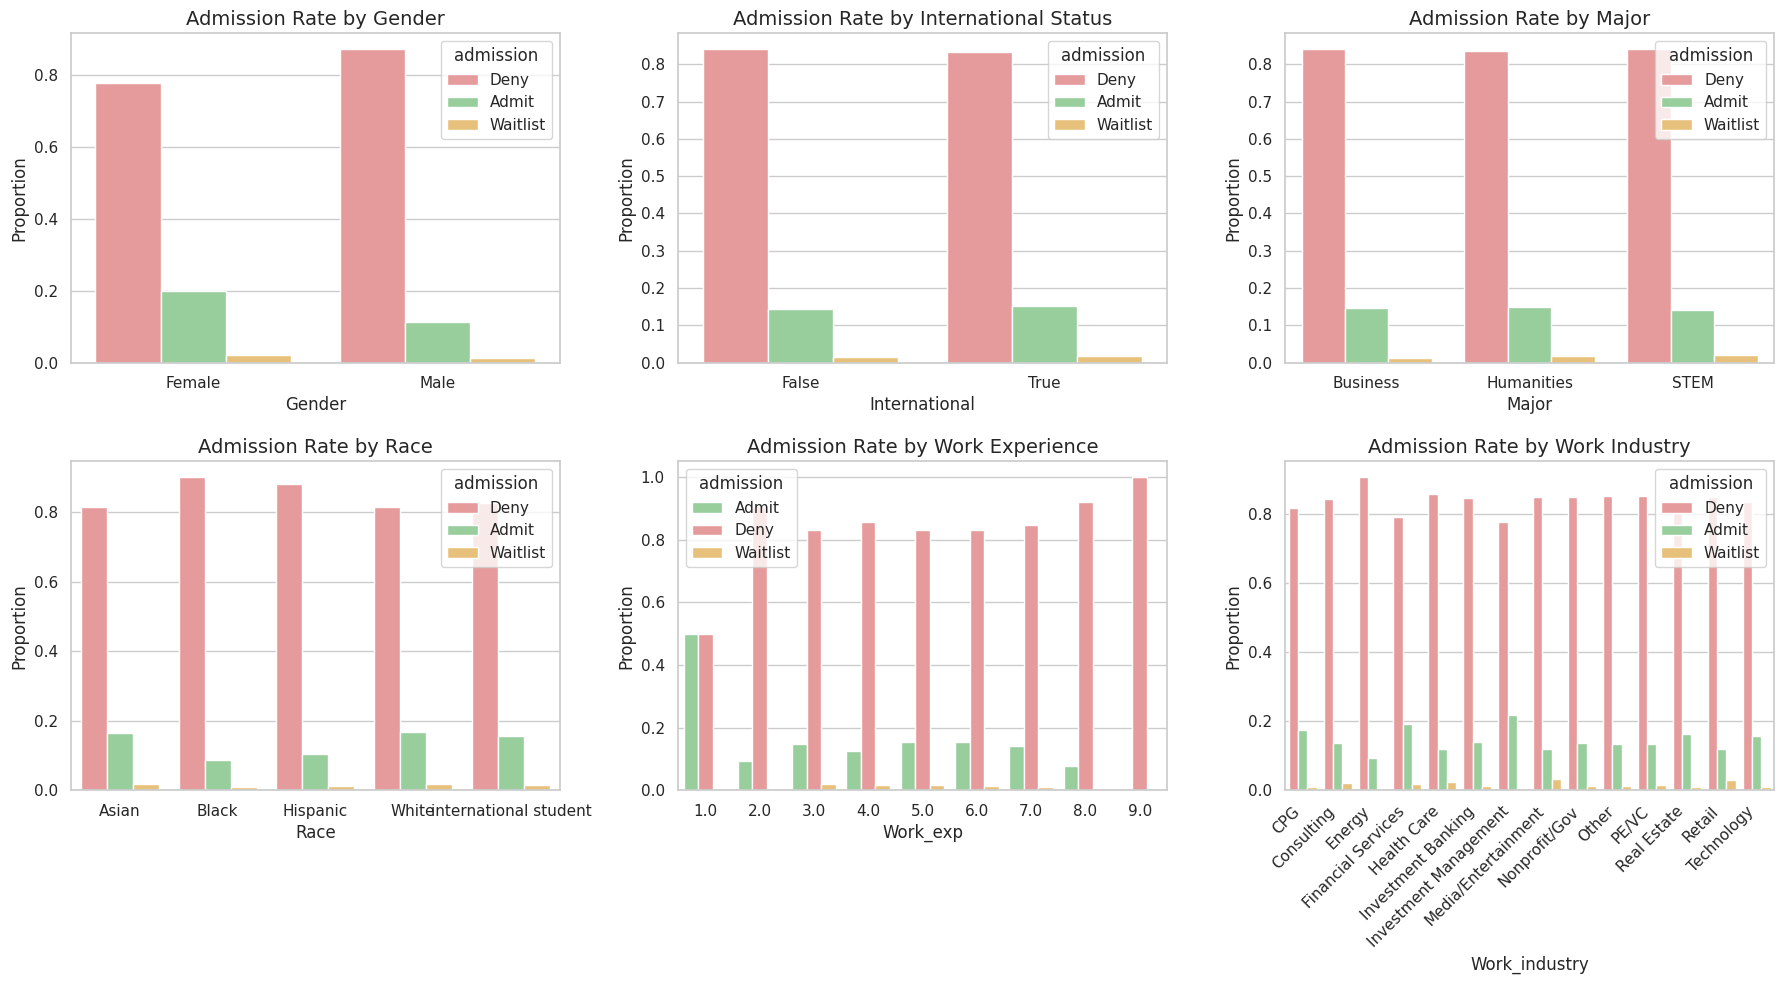

In [ ]:
custom_palette = {
    'Admit': '#8fd694',   # Soft green
    'Deny': '#f28e8e',    # Muted red
    'Waitlist': '#f9c66a' # Pastel orange
}

columns_to_plot = ['gender', 'international', 'major', 'race', 'work_exp', 'work_industry']
titles = ['Admission Rate by Gender', 'Admission Rate by International Status', 'Admission Rate by Major',
          'Admission Rate by Race', 'Admission Rate by Work Experience', 'Admission Rate by Work Industry']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjust size for clarity
axes = axes.flatten()

# Plot each of the specified columns
for i, column in enumerate(columns_to_plot):
    # Calculate proportions for each admission outcome within each column
    admission_rate = (
        df_filtered.groupby(column)['admission']
        .value_counts(normalize=True)
        .rename('proportion')
        .reset_index()
    )

    sns.barplot(x=column, y='proportion', hue='admission', data=admission_rate, palette=custom_palette, ax=axes[i])

    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Proportion')
    if column == 'work_industry':
        axes[i].tick_params(axis='x', rotation=45)  # Rotates the x-axis labels
        # Set x-ticks to show all unique categories
        axes[i].set_xticks(range(len(admission_rate[column].unique())))
        axes[i].set_xticklabels(admission_rate[column].unique(), rotation=45, ha='right')



plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

1. Gender Distribution:
- Males appear to have a higher denial rate (around 85%) compared to females (around 75%)
- Females show a slightly higher admission rate (about 20%) compared to males (about 12%)
- Waitlist rates are very low for both genders (less than 5%)

2. International Status:
- Both international and domestic students face similar denial rates (around 80-85%)
- International students ("True") have a slightly lower admission rate compared to domestic students
- Waitlist rates remain consistently low across both groups

3. Major Selection:
- Admission rates are relatively consistent across Business, Humanities, and STEM majors (around 15%)
- STEM appears to have marginally higher denial rates compared to other majors
- Business and Humanities show very similar patterns in terms of admission outcomes

4. Race/Ethnicity:
- All racial groups show high denial rates (75-90%)
- Black and Hispanic applicants appear to have slightly higher denial rates
- Asian and White applicants show marginally higher admission rates
- International students show patterns similar to the overall average

5. Work Experience:
- Interesting trend where applicants with 1 year of experience show notably higher admission rates (around 45%)
- As work experience increases beyond 1 year, admission rates generally decrease
- Applicants with 8-9 years of experience face the highest denial rates

6. Work Industry:
- Denial rates are consistently high across all industries (70-90%)
- Some variation in admission rates between industries
- Nonprofit sector appears to have slightly better admission rates
- Technology and consulting industries show relatively consistent patterns

General Observations:
1. Overall, the program appears to be highly selective with high denial rates across all categories
2. Having some work experience (particularly 1 year) seems to be advantageous
3. Gender and international status appear to have modest impacts on admission chances
4. Major choice doesn't seem to significantly influence admission chances
5. There are some disparities in admission rates across racial/ethnic groups
6. Work industry background shows some variation in outcomes but no dramatic differences


### b. Numerical Features

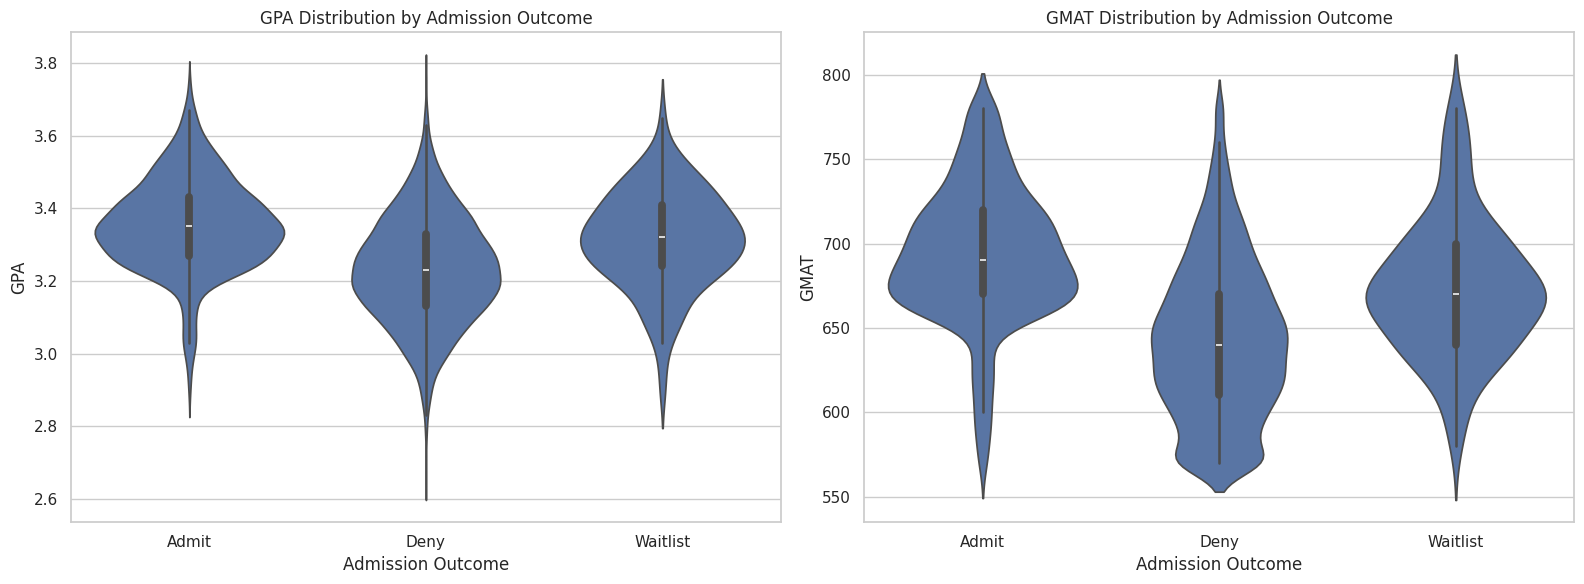

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust the size for clarity

# Violin plot for GPA vs. Admission
sns.violinplot(x='admission', y='gpa', data=df_filtered, ax=axes[0])
axes[0].set_title('GPA Distribution by Admission Outcome')
axes[0].set_xlabel('Admission Outcome')
axes[0].set_ylabel('GPA')

# Violin plot for GMAT vs. Admission
sns.violinplot(x='admission', y='gmat', data=df_filtered, ax=axes[1])
axes[1].set_title('GMAT Distribution by Admission Outcome')
axes[1].set_xlabel('Admission Outcome')
axes[1].set_ylabel('GMAT')


plt.tight_layout()
plt.show()

### c. How race and gender affect the distributions of gpa and gmat w.r.t admission decision

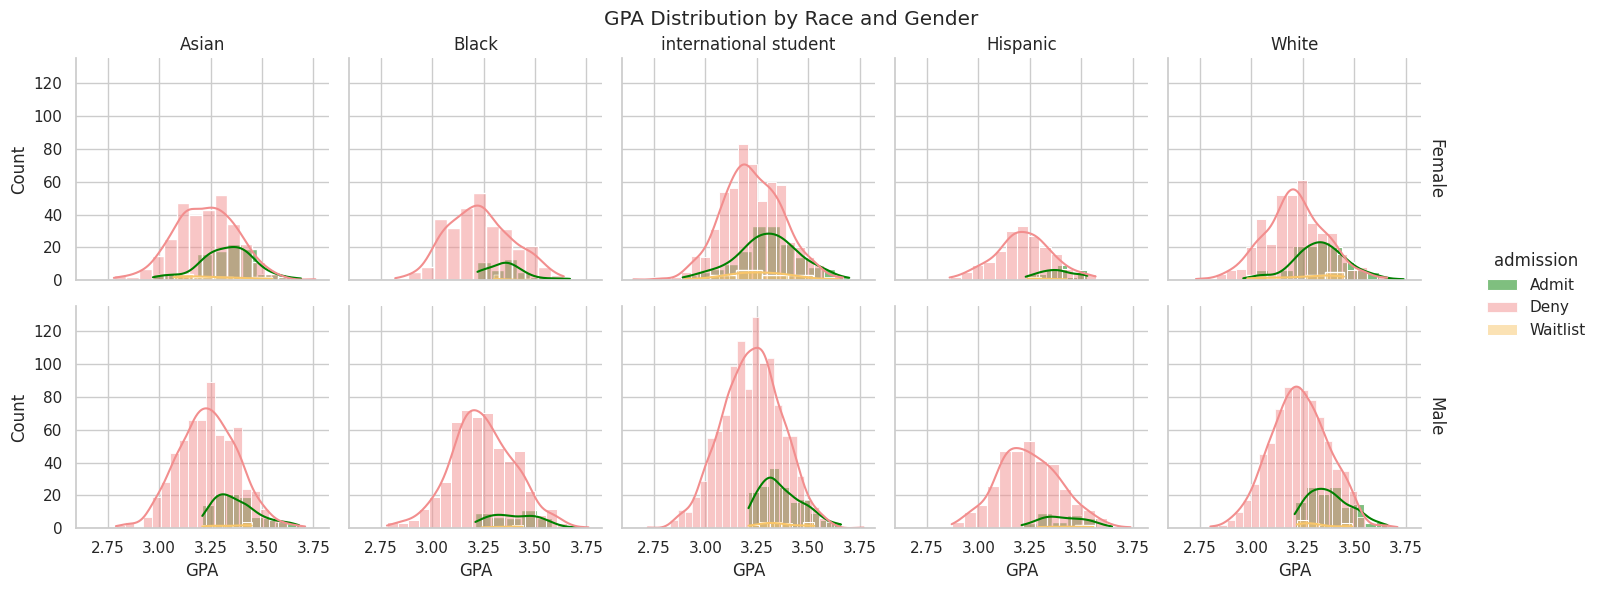

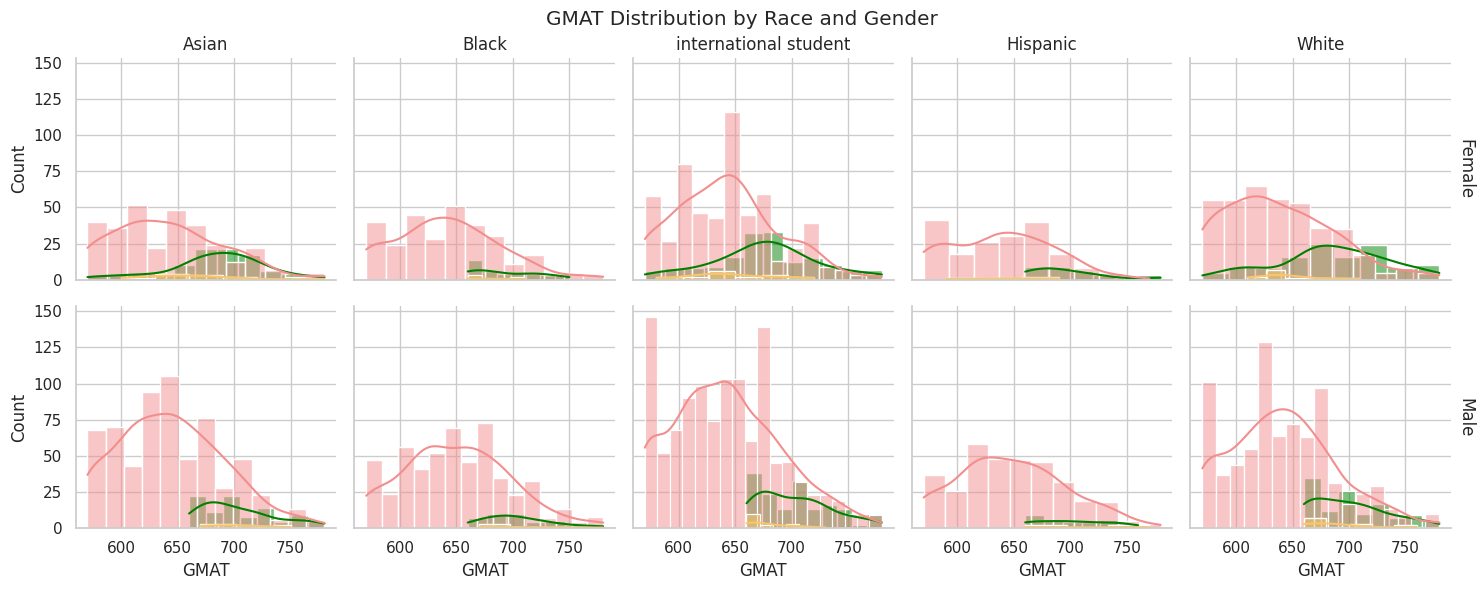

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
custom_palette_2 = {
    'Admit': 'green',   # Soft green
    'Deny': '#f28e8e',    # Muted red
    'Waitlist': '#f9c66a' # Pastel orange
}
# Create a FacetGrid for GPA by combinations of race and gender
gpa_grid = sns.FacetGrid(df_filtered, col="race", row="gender", hue="admission", palette=custom_palette_2, margin_titles=True)
gpa_grid.map(sns.histplot, "gpa", kde=True)
gpa_grid.add_legend()
gpa_grid.set_axis_labels('GPA', 'Count')
gpa_grid.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.subplots_adjust(top=0.9)
gpa_grid.fig.suptitle('GPA Distribution by Race and Gender')

plt.show()

# Create a FacetGrid for GMAT by combinations of race and gender
gmat_grid = sns.FacetGrid(df_filtered, col="race", row="gender", hue="admission", palette=custom_palette_2, margin_titles=True)
gmat_grid.map(sns.histplot, "gmat", kde=True)
gpa_grid.add_legend()  # Add legend with custom palette
gmat_grid.set_axis_labels('GMAT', 'Count')
gmat_grid.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.subplots_adjust(top=0.9)
gmat_grid.fig.suptitle('GMAT Distribution by Race and Gender')

plt.show()


GPA Distribution Analysis:

1. Gender Patterns:
- Female applicants generally show slightly higher GPAs across all racial groups
- The GPA distribution for admitted females tends to be more right-skewed (higher GPAs)
- Males show more variation in GPA across racial groups

2. Race-Specific Patterns:
- Asian applicants:
  * Show high GPA concentration around 3.2-3.5
  * Similar patterns for both genders
  * Relatively high admission rates at higher GPAs

- Black applicants:
  * GPA distributions centered slightly lower (3.0-3.3)
  * Female Black applicants show slightly higher GPAs than males
  * Admitted students typically have GPAs above 3.2

- International students:
  * Largest applicant pool
  * Strong concentration of GPAs between 3.2-3.4
  * Similar patterns across genders

- Hispanic applicants:
  * Smaller sample size but similar distribution to overall average
  * Female Hispanic applicants show slightly higher GPAs
  * Admission cutoffs appear similar to other groups

- White applicants:
  * Broad GPA distribution (2.8-3.7)
  * Female applicants show slightly higher average GPAs
  * Clear correlation between higher GPAs and admission rates

GMAT Distribution Analysis:

1. Gender Patterns:
- Male applicants generally show higher GMAT scores across racial groups
- The admitted male candidates tend to have higher GMAT thresholds
- Female applicants show more variation in admitted GMAT scores

2. Race-Specific Patterns:
- Asian applicants:
  * High GMAT scores (650-750 range)
  * Strong performance from both genders
  * Clear correlation between high scores and admission

- Black applicants:
  * Wider GMAT distribution (600-700)
  * Lower average scores compared to other groups
  * Admission possible at relatively lower GMAT scores

- International students:
  * Large concentration in 650-700 range
  * Male international students show higher average scores
  * Clear GMAT threshold for admissions

- Hispanic applicants:
  * Smaller sample size
  * Wide score distribution (600-750)
  * Gender gap less pronounced than other groups

- White applicants:
  * Broad GMAT distribution
  * Male applicants show higher average scores
  * Strong correlation between high scores and admission

Key Insights:
1. There appear to be different implicit thresholds for different demographic groups
2. Gender gaps are more pronounced in GMAT scores than in GPAs
3. International students face possibly higher score requirements
4. There's evidence of holistic review, as admitted students show range in both metrics
5. The interplay between GPA and GMAT seems to vary by demographic group


### d. Visualizing Admission Outcomes by Race, Gender, and Academic Focus

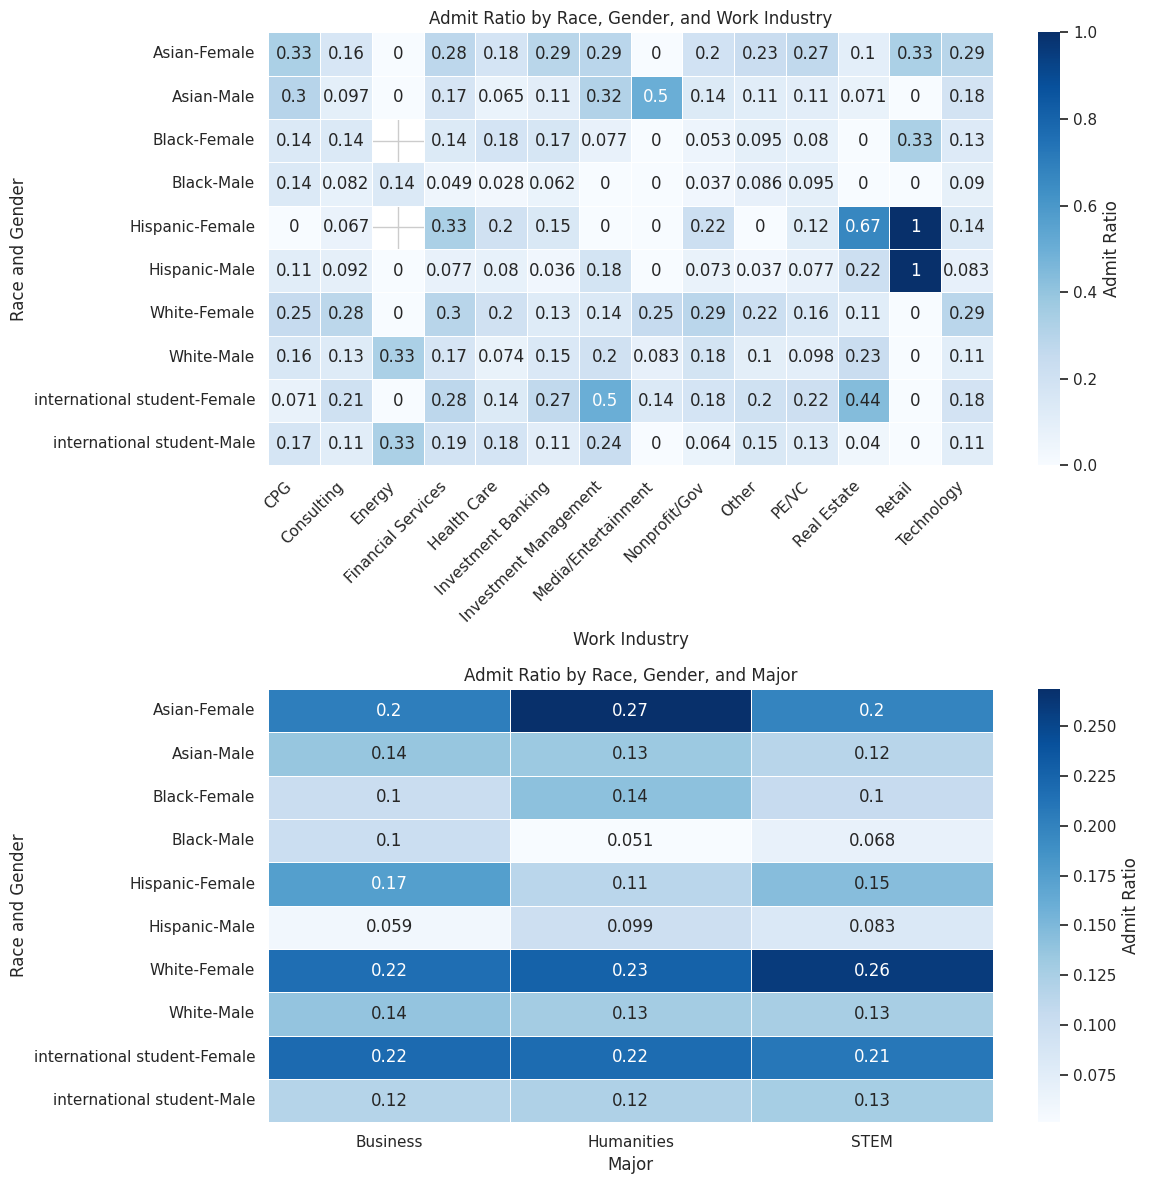

In [ ]:
# Calculate the admit counts for major
admit_counts_major = (
    df_filtered.groupby(['race', 'gender', 'major', 'admission'])
    .size()
    .reset_index(name='count')
)
total_counts_major = (
    admit_counts_major.groupby(['race', 'gender', 'major'])
    .agg(total=('count', 'sum'))
    .reset_index()
)
admit_counts_major = admit_counts_major[admit_counts_major['admission'] == 'Admit']
admit_counts_major = admit_counts_major[['race', 'gender', 'major', 'count']]
admit_counts_major = admit_counts_major.rename(columns={'count': 'admit_count'})

admit_ratios_major = pd.merge(total_counts_major, admit_counts_major, on=['race', 'gender', 'major'], how='left')
admit_ratios_major['admit_ratio'] = admit_ratios_major['admit_count'] / admit_ratios_major['total']
admit_ratios_major.fillna(0, inplace=True)

# Generate heatmap data for major
heatmap_data_major = admit_ratios_major.pivot_table(index=['race', 'gender'], columns='major', values='admit_ratio')


# Calculate the admit counts for work industry
admit_counts_industry = (
    df_filtered.groupby(['race', 'gender', 'work_industry', 'admission'])
    .size()
    .reset_index(name='count')
)
total_counts_industry = (
    admit_counts_industry.groupby(['race', 'gender', 'work_industry'])
    .agg(total=('count', 'sum'))
    .reset_index()
)
admit_counts_industry = admit_counts_industry[admit_counts_industry['admission'] == 'Admit']
admit_counts_industry = admit_counts_industry[['race', 'gender', 'work_industry', 'count']]
admit_counts_industry = admit_counts_industry.rename(columns={'count': 'admit_count'})

admit_ratios_industry = pd.merge(total_counts_industry, admit_counts_industry, on=['race', 'gender', 'work_industry'], how='left')
admit_ratios_industry['admit_ratio'] = admit_ratios_industry['admit_count'] / admit_ratios_industry['total']  # Calculate admit ratio
admit_ratios_industry.fillna(0, inplace=True)

# Generate heatmap data for work industry
heatmap_data_industry = admit_ratios_industry.pivot_table(index=['race', 'gender'], columns='work_industry', values='admit_ratio')



plt.figure(figsize=(12, 12))

# Heatmap for Admit Ratio by Race, Gender, and Work Industry
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.heatmap(heatmap_data_industry,
            annot=True, cmap='Blues', cbar_kws={'label': 'Admit Ratio'}, linewidths=.5)
plt.title('Admit Ratio by Race, Gender, and Work Industry')
plt.xlabel('Work Industry')
plt.ylabel('Race and Gender')
plt.xticks(rotation=45, ha='right')

# Heatmap for Admit Ratio by Race, Gender, and Major
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.heatmap(heatmap_data_major,
            annot=True, cmap='Blues', cbar_kws={'label': 'Admit Ratio'}, linewidths=.5)
plt.title('Admit Ratio by Race, Gender, and Major')
plt.xlabel('Major')
plt.ylabel('Race and Gender')

plt.tight_layout()
plt.show()

Work Industry Analysis:

1. Highest Admission Rates:
- Hispanic candidates in Retail (100% admission rate)
- Asian-Male in Investment Management (50%)
- International student-Female in Investment Management (50%)
- Hispanic-Female in Real Estate (67%)

2. Gender-Specific Trends:
- Females generally show higher admission rates across most industries
- Notable female advantages in:
  * Technology (25-30% for females vs 10-18% for males)
  * Consulting (16-28% for females vs 8-13% for males)
  * Financial Services (28-30% for females vs 5-19% for males)

3. Industry-Specific Patterns:
- CPG shows strong rates for Asian candidates (30-33%)
- Investment Banking/Management favors international and Asian candidates
- Consulting shows higher rates for White and Asian females
- Technology sector shows relatively consistent admission rates across groups

Major Analysis:

1. Overall Patterns:
- Business majors:
  * Highest rates for White-Female (22%) and International-Female (22%)
  * Lower rates for Hispanic-Male (5.9%) and Black-Male (10%)

- Humanities majors:
  * Asian-Female leads with 27% admission rate
  * White-Female and International-Female show strong rates (23% and 22%)
  * Notably lower rates for Black-Male (5.1%)

- STEM majors:
  * White-Female leads with 26% admission rate
  * Consistent performance for International candidates (21-13%)
  * Lower rates for Black candidates across genders

2. Gender Disparities:
- Consistent female advantage across all majors:
  * Business: ~5-10% higher for females
  * Humanities: ~8-12% higher for females
  * STEM: ~7-13% higher for females

3. Race-Specific Trends:
- Asian candidates:
  * Strong performance in Humanities
  * Consistent across all majors
  * Clear gender gap favoring females

- Black candidates:
  * Stronger performance in Humanities for females
  * Consistently lower rates for males across majors
  * Largest gender gap in Humanities

- Hispanic candidates:
  * Better performance in Business for females
  * Moderate rates across majors for females
  * Lower rates for males across all majors

- White candidates:
  * Strong performance across all majors for females
  * Consistent rates for males
  * Largest advantage in STEM for females

- International students:
  * Consistent performance across majors
  * Strong female advantage
  * Similar patterns to Asian candidates

Key Insights:
1. Clear gender advantage for female applicants across most categories
2. Industry-specific preferences exist for certain demographic groups
3. Major choice impacts admission chances differently for different demographics
4. Some industries show very high admission rates for specific demographic groups
5. Consistent patterns of disadvantage for certain combinations of race/gender/major


##Chi-square and decision tree

In [ ]:
df = df.drop(columns=['application_id'])

features = [col for col in df.columns if col != 'admission']

#chi-square
for feature in features:

    contingency_table = pd.crosstab(df[feature], df['admission'])

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Feature: {feature}")
    print(f"Chi-Square Statistic: {chi2:.2f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("---------")

Feature: gender
Chi-Square Statistic: 96.16
P-value: 0.0000
Degrees of Freedom: 2
---------
Feature: international
Chi-Square Statistic: 0.68
P-value: 0.7128
Degrees of Freedom: 2
---------
Feature: gpa
Chi-Square Statistic: 746.74
P-value: 0.0000
Degrees of Freedom: 200
---------
Feature: major
Chi-Square Statistic: 4.03
P-value: 0.4026
Degrees of Freedom: 4
---------
Feature: race
Chi-Square Statistic: 48.52
P-value: 0.0000
Degrees of Freedom: 8
---------
Feature: gmat
Chi-Square Statistic: 993.51
P-value: 0.0000
Degrees of Freedom: 42
---------
Feature: work_exp
Chi-Square Statistic: 13.24
P-value: 0.6548
Degrees of Freedom: 16
---------
Feature: work_industry
Chi-Square Statistic: 30.20
P-value: 0.2593
Degrees of Freedom: 26
---------


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Average Accuracy from 5-Fold Cross Validation: 0.841372351160444
Test Accuracy on Test Set: 0.8272800645682001


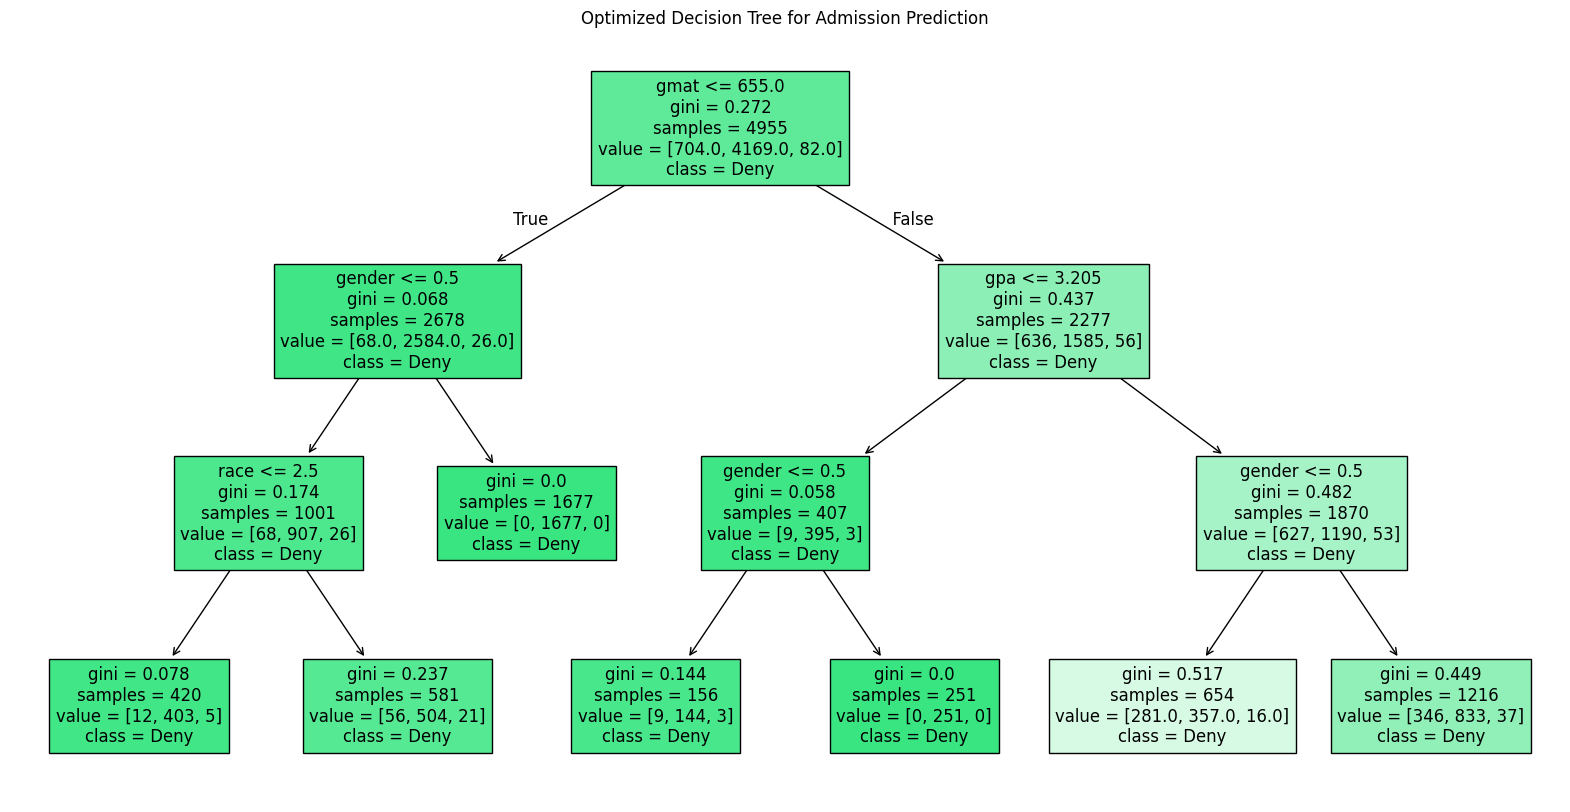

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

categorical_cols = ['gender', 'international', 'major', 'work_industry', 'race']

# coding categorical variables
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# extract features and target variables
X = df.drop(columns=['admission', 'application_id'])
y = df['admission']

# encode the target variable
label_encoders['admission'] = LabelEncoder()
y = label_encoders['admission'].fit_transform(y)

# split data 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# set grid search parameters
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# grid search using 5-fold cross validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

mean_test_score = grid_search.best_score_
print("Average Accuracy from 5-Fold Cross Validation:", mean_test_score)

# train the model using optimal parameters
best_clf = grid_search.best_estimator_

# evaluate on the test set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy on Test Set:", test_accuracy)

# plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(best_clf, feature_names=X.columns, class_names=label_encoders['admission'].classes_, filled=True)
plt.title("Optimized Decision Tree for Admission Prediction")
plt.show()



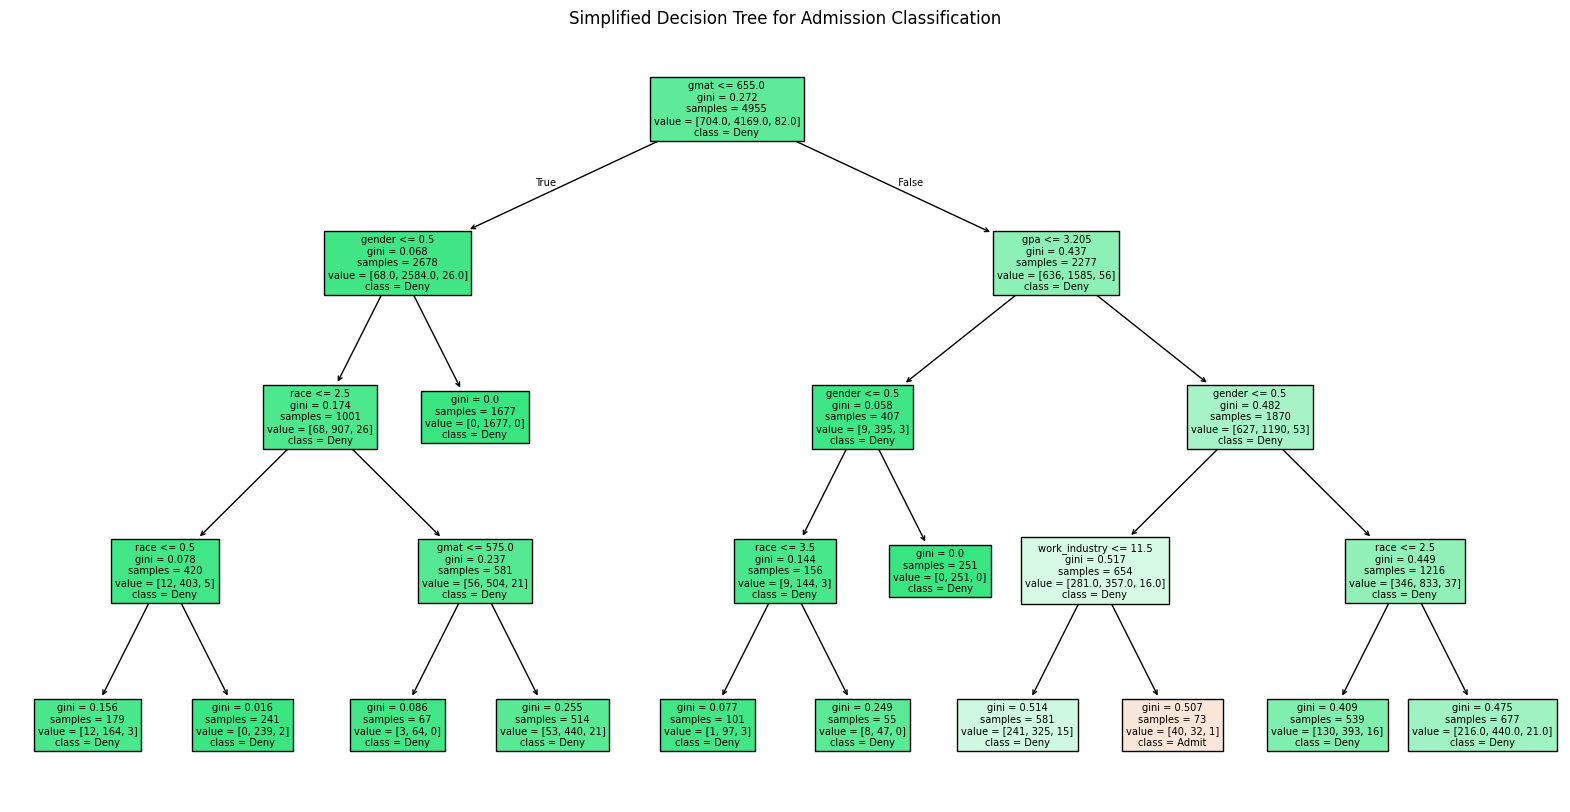

Model Accuracy: 0.8248587570621468


In [ ]:
#build decision tree again to see the first admit class
clf = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=10)
clf.fit(X_train, y_train)

class_names = [str(class_) for class_ in sorted(label_encoders['admission'].classes_)]

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Simplified Decision Tree for Admission Classification")
plt.show()

from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

### Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Data preprocessing
categorical_cols = ['gender', 'race', 'admission']
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Extract features and target variables
X = df.drop(columns=['admission', 'application_id', 'international', 'major', 'work_industry', 'work_exp'])
y = df['admission']

# Split data 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Create base model
rf = RandomForestClassifier(random_state=42)

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
print("Starting GridSearchCV...")
start_time = time.time()

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    return_train_score=True
)

# Perform grid search
grid_search.fit(X_train, y_train)

print(f"\nGridSearchCV completed in {(time.time() - start_time)/60:.2f} minutes")

# Print best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions with best model
y_pred = best_rf.predict(X_test)

# Print performance metrics
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Starting GridSearchCV...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

GridSearchCV completed in 12.43 minutes

Best Parameters: {'class_weight': None, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.841372351160444

Test Set Performance:
Accuracy: 0.8272800645682001

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.83      1.00      0.91      1025
           2       0.00      0.00      0.00        18

    accuracy                           0.83      1239
   macro avg       0.28      0.33      0.30      1239
weighted avg       0.68      0.83      0.75      1239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


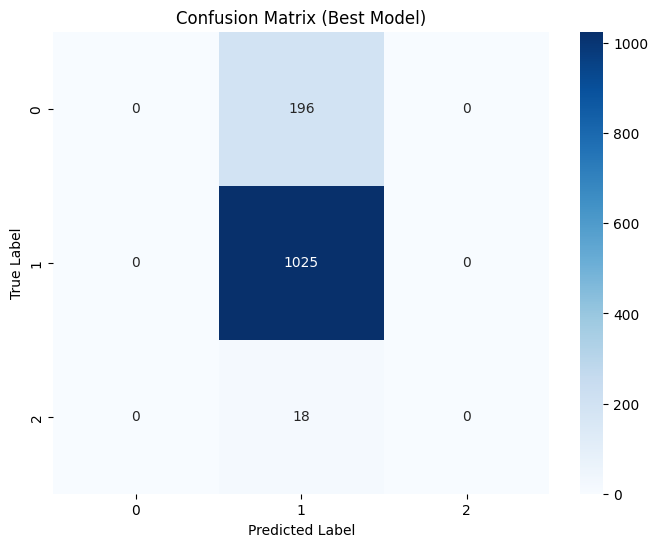

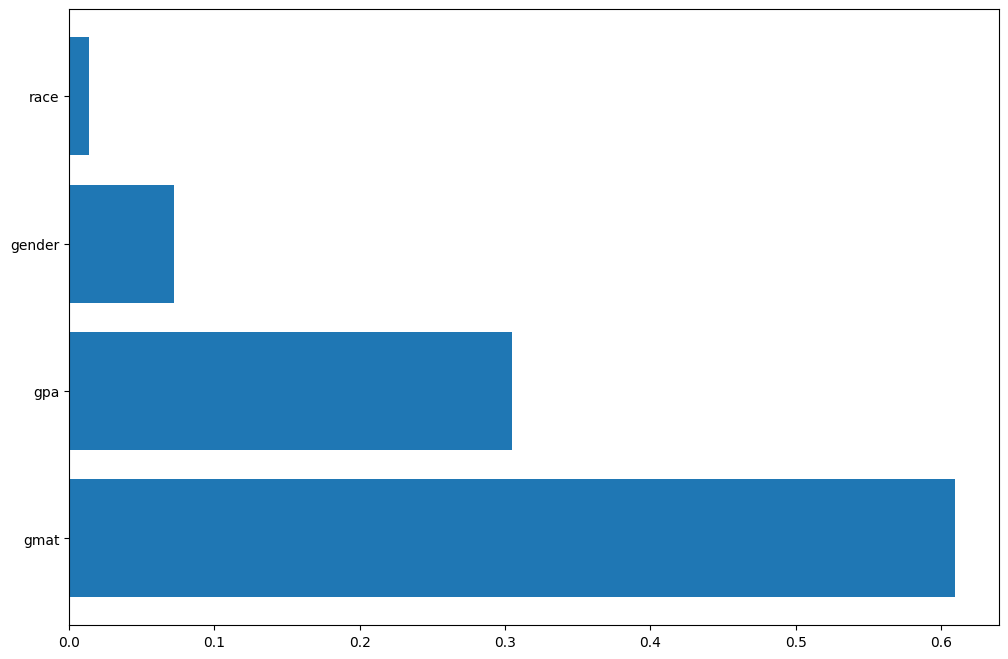

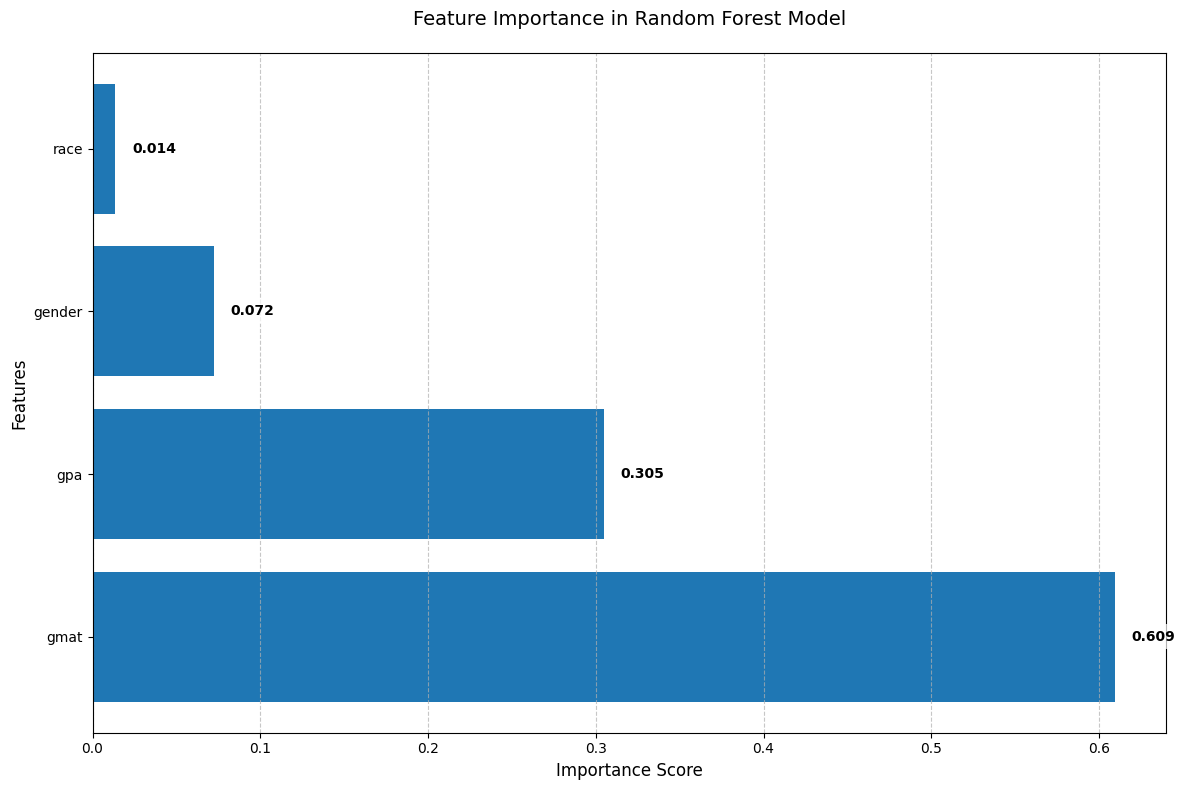


Detailed Feature Importance:
feature  importance
   gmat       0.609
    gpa       0.305
 gender       0.072
   race       0.014


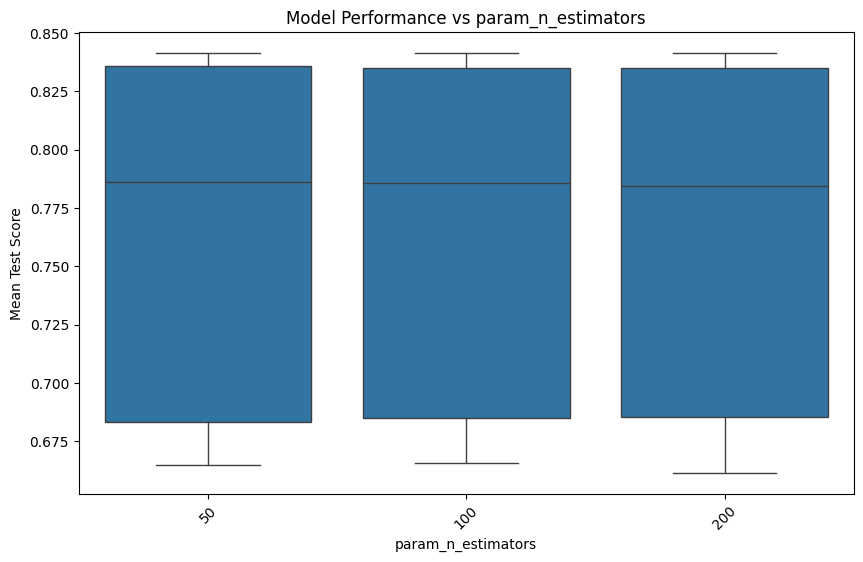

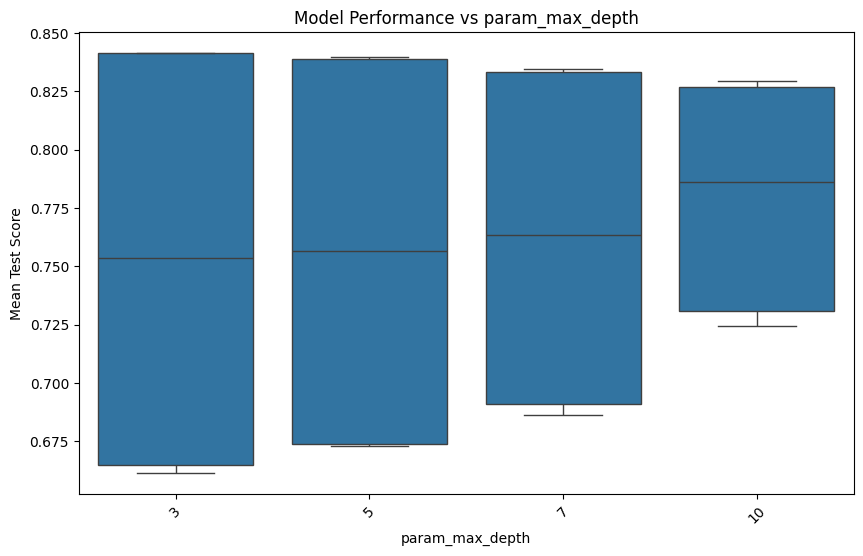

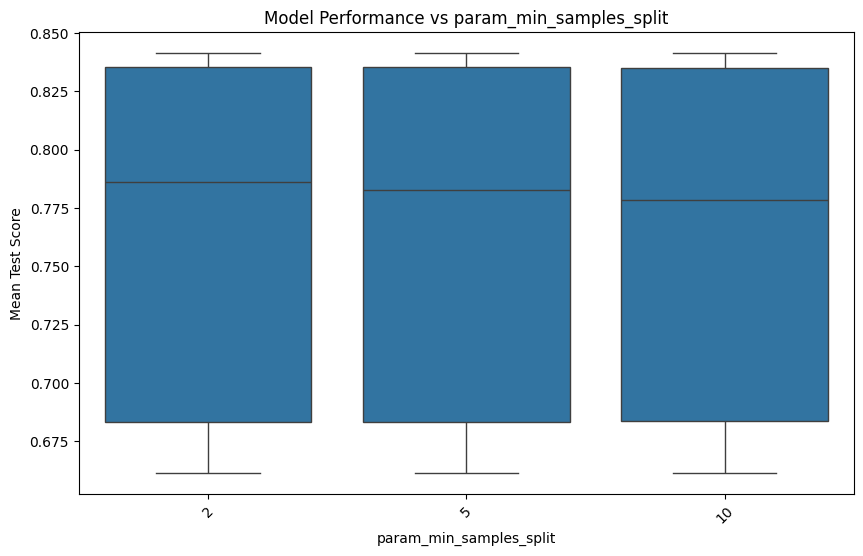

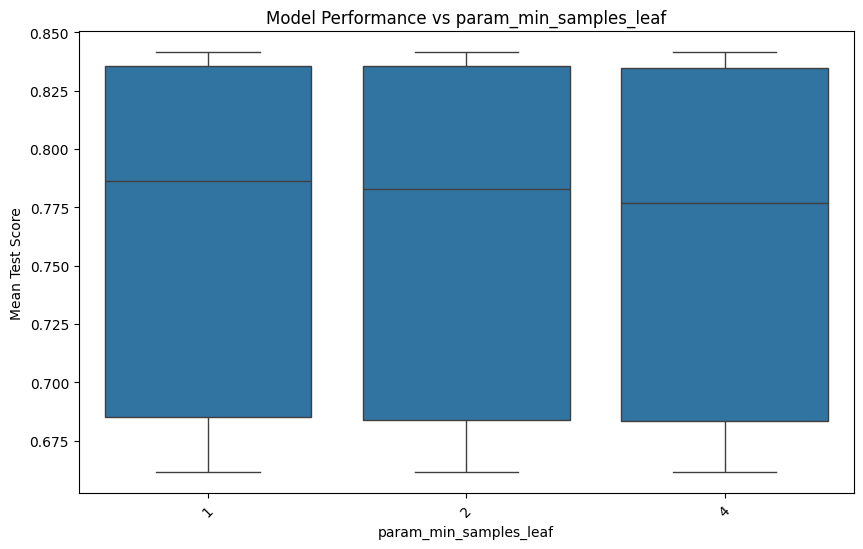


Model Comparison:
Base Model Accuracy: 0.784503631961259
Tuned Model Accuracy: 0.8272800645682001

Top 5 Parameter Combinations:
    mean_test_score  std_test_score  \
0          0.841372        0.009213   
42         0.841372        0.009213   
30         0.841372        0.009213   
31         0.841372        0.009213   
33         0.841372        0.009213   

                                               params  
0   {'class_weight': None, 'max_depth': 3, 'max_fe...  
42  {'class_weight': None, 'max_depth': 3, 'max_fe...  
30  {'class_weight': None, 'max_depth': 3, 'max_fe...  
31  {'class_weight': None, 'max_depth': 3, 'max_fe...  
33  {'class_weight': None, 'max_depth': 3, 'max_fe...  


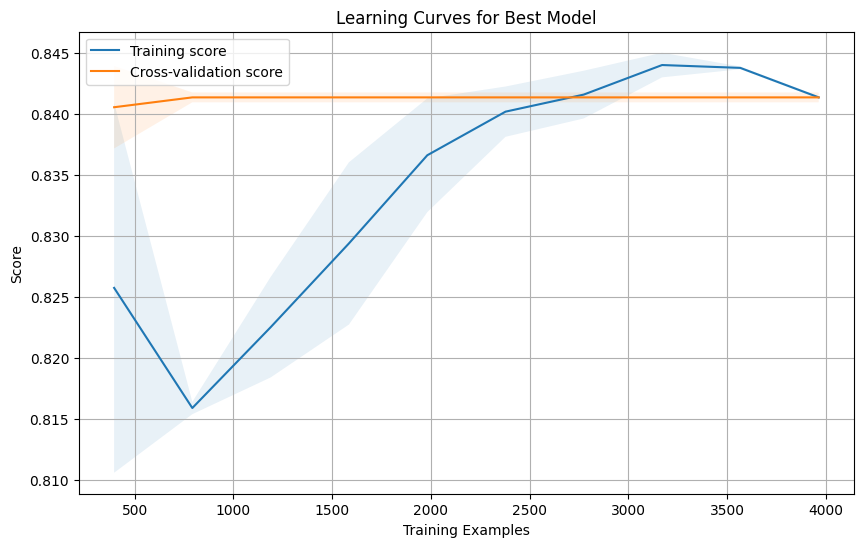

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Best Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming we have the feature importance data from the best model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))

# Create bar plot
bars = plt.barh(feature_importance['feature'], feature_importance['importance'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming we have the feature importance data from the best model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))

# Create bar plot
bars = plt.barh(feature_importance['feature'], feature_importance['importance'])

# Add value labels on the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01,  # Add small offset for better visibility
             bar.get_y() + bar.get_height()/2,
             f'{width:.3f}',
             ha='left', va='center',
             fontweight='bold',
             fontsize=10,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Customize the plot
plt.title('Feature Importance in Random Forest Model', fontsize=14, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Print detailed feature importance table
print("\nDetailed Feature Importance:")
print(feature_importance.to_string(index=False, float_format=lambda x: '{:.3f}'.format(x)))

# Analyze grid search results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Plot parameter performance
def plot_param_performance(cv_results, param_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=param_name, y='mean_test_score', data=cv_results)
    plt.title(f'Model Performance vs {param_name}')
    plt.ylabel('Mean Test Score')
    plt.xticks(rotation=45)
    plt.show()

# Plot performance for each parameter
for param in ['param_n_estimators', 'param_max_depth', 'param_min_samples_split',
              'param_min_samples_leaf']:
    plot_param_performance(cv_results, param)

# Compare with base model
base_rf = RandomForestClassifier(random_state=42)
base_rf.fit(X_train, y_train)
base_pred = base_rf.predict(X_test)

print("\nModel Comparison:")
print("Base Model Accuracy:", accuracy_score(y_test, base_pred))
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))

# Save detailed results
detailed_results = pd.DataFrame({
    'mean_test_score': cv_results['mean_test_score'],
    'std_test_score': cv_results['std_test_score'],
    'params': [str(p) for p in cv_results['params']]
}).sort_values('mean_test_score', ascending=False)

print("\nTop 5 Parameter Combinations:")
print(detailed_results.head())

# Learning curves for best model
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curves for Best Model')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(best_rf, X_train, y_train)

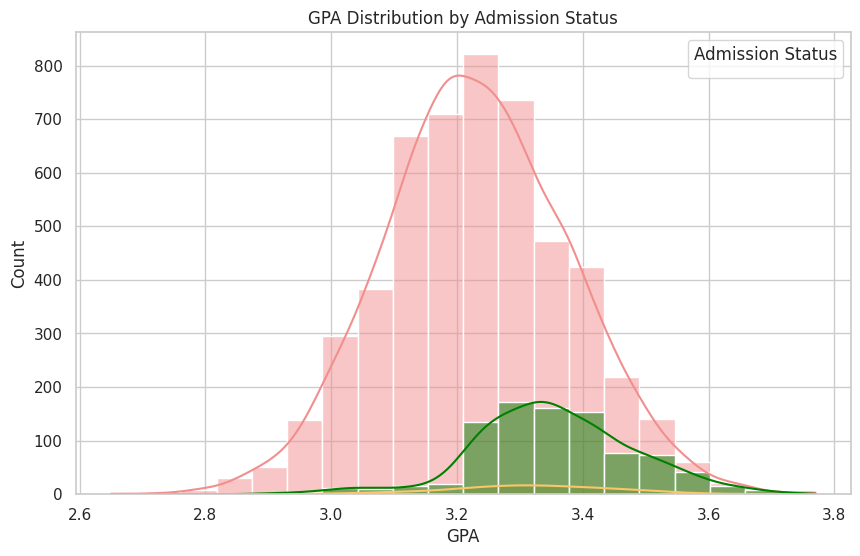

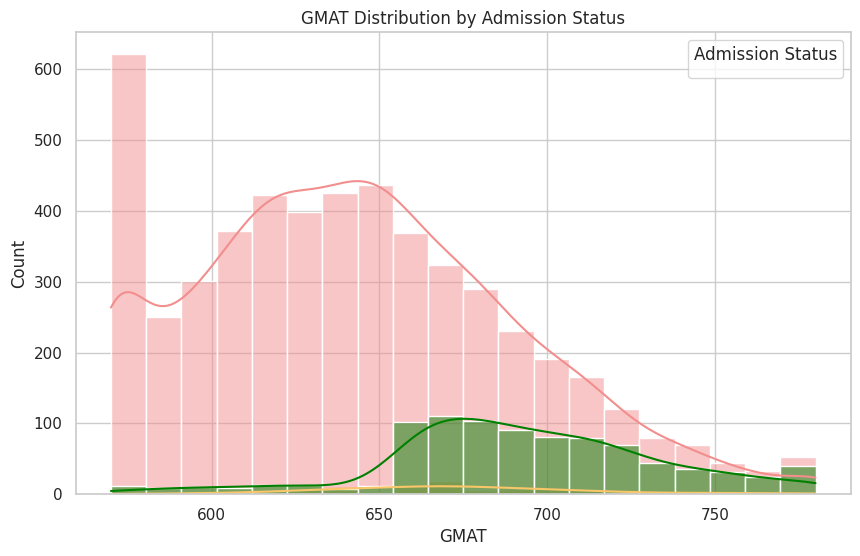

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
custom_palette_2 = {
    'Admit': 'green',     # Soft green
    'Deny': '#f28e8e',    # Muted red
    'Waitlist': '#f9c66a' # Pastel orange
}

# Plot layered histogram for GPA with admission status
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x="gpa", hue="admission", kde=True, palette=custom_palette_2, multiple="layer", bins=20)
plt.title('GPA Distribution by Admission Status')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.legend(title="Admission Status")
plt.show()

# Plot layered histogram for GMAT with admission status
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x="gmat", hue="admission", kde=True, palette=custom_palette_2, multiple="layer", bins=20)
plt.title('GMAT Distribution by Admission Status')
plt.xlabel('GMAT')
plt.ylabel('Count')
plt.legend(title="Admission Status")
plt.show()